In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [20]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
data.shape

(200, 5)

In [23]:
data = data[['Annual Income (k$)','Spending Score (1-100)']].values

In [24]:
from sklearn.cluster import KMeans
wcss = []

In [25]:
for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  k_means.fit(data)
  wcss.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

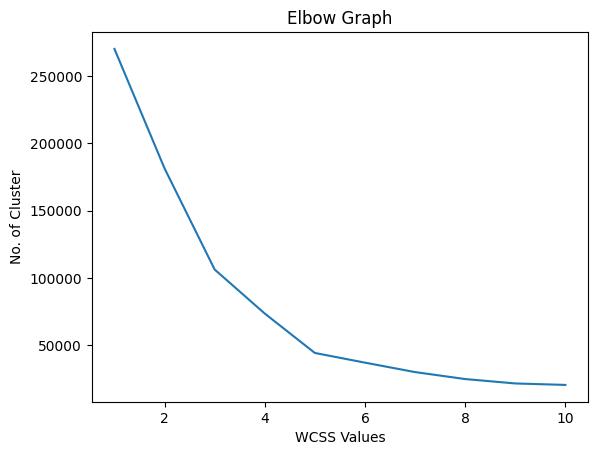

In [26]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Graph")
plt.ylabel("No. of Cluster")
plt.xlabel("WCSS Values")
plt.show()

In [29]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [30]:
y_kmeans = kmeansmodel.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


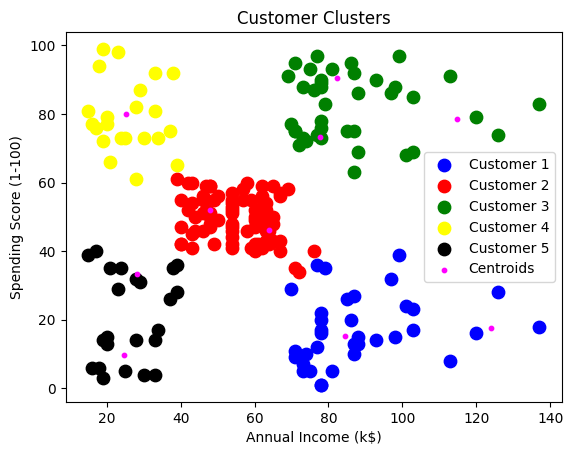

In [31]:
plt.scatter(data[y_kmeans == 0,0], data[y_kmeans == 0,1], s = 80, c = "blue", label = "Customer 1")
plt.scatter(data[y_kmeans == 1,0], data[y_kmeans == 1,1], s = 80, c = "red", label = "Customer 2")
plt.scatter(data[y_kmeans == 2,0], data[y_kmeans == 2,1], s = 80, c = "green", label = "Customer 3")
plt.scatter(data[y_kmeans == 3,0], data[y_kmeans == 3,1], s = 80, c = "yellow", label = "Customer 4")
plt.scatter(data[y_kmeans == 4,0], data[y_kmeans == 4,1], s = 80, c = "black", label = "Customer 5")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 10, c = "magenta", label = "Centroids")
plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()